# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

## Shutdown Warning

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data

In [3]:
train = pd.read_csv('insurancetrain.csv')
test = pd.read_csv('insurancetest.csv')
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


## Statistical Summary of Data

In [4]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


## Data types and NULL data entry

### Data types

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


### NULL Entry

In [6]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

# Exploratory Data Analysis (EDA)

## Relationship between Features 

### Response -> Target 

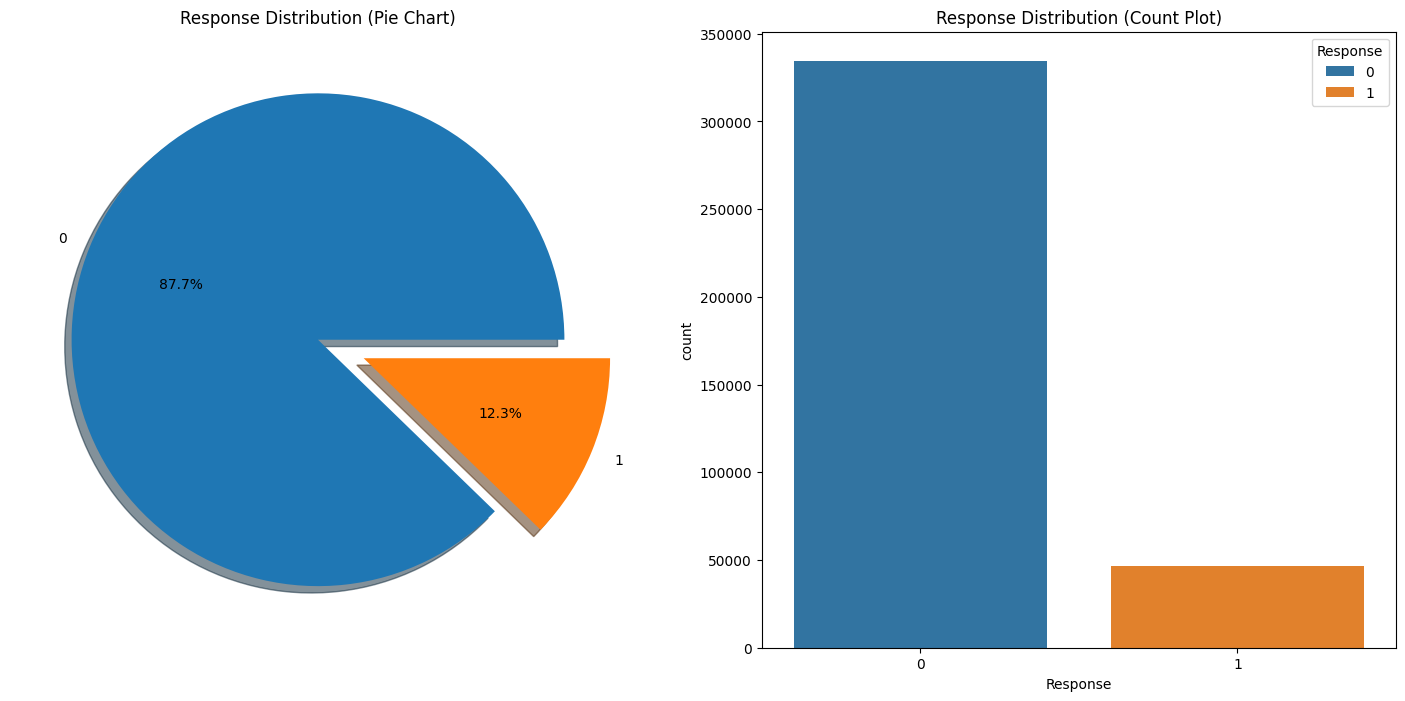

In [7]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
train['Response'].value_counts().plot(kind = 'pie', shadow = True, ax = ax[0], explode = [0, 0.2], autopct = '%1.1f%%')
ax[0].set_title('Response Distribution (Pie Chart)')
ax[0].set_ylabel('')
sns.countplot(data = train, x = 'Response', hue = 'Response')
ax[1].set_title('Response Distribution (Count Plot)')
plt.show()

Based on the training data, we can see that the result is mostly dominated by 0, meaning customer mostly not interested in purchasing vehicle insurance.

### ID -> Not relevant

In [8]:
train['id'].value_counts()

id
1         1
254071    1
254080    1
254079    1
254078    1
         ..
127035    1
127034    1
127033    1
127032    1
381109    1
Name: count, Length: 381109, dtype: int64

We can see here that ID only represent row, meaning it does not related to our Machine Learning models, hence we will drop it.

In [9]:
train.drop(columns=['id'], inplace = True)
test.drop(columns=['id'], inplace = True)

### Gender

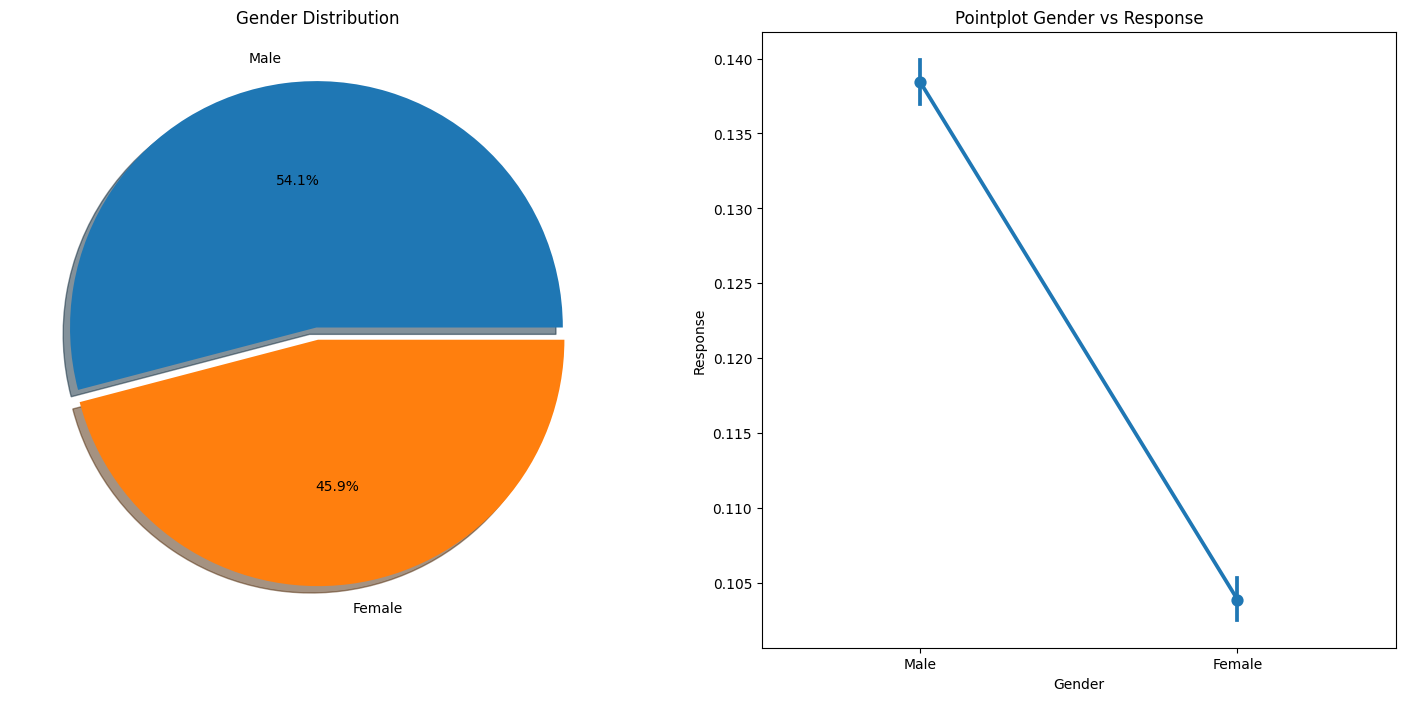

In [10]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
train['Gender'].value_counts().plot(kind = 'pie', ax = ax[0], autopct = '%1.1f%%', shadow = True, explode = [0.05, 0])
ax[0].set_ylabel('')
ax[0].set_title('Gender Distribution')
ax[1].set_title('Pointplot Gender vs Response')
sns.pointplot(data = train, x = 'Gender', y = 'Response')
plt.show()

Based on the graph, we can see here that the customer who buys vehicle insurance are mostly Male, as Male has a higher percentage than Female

### Age

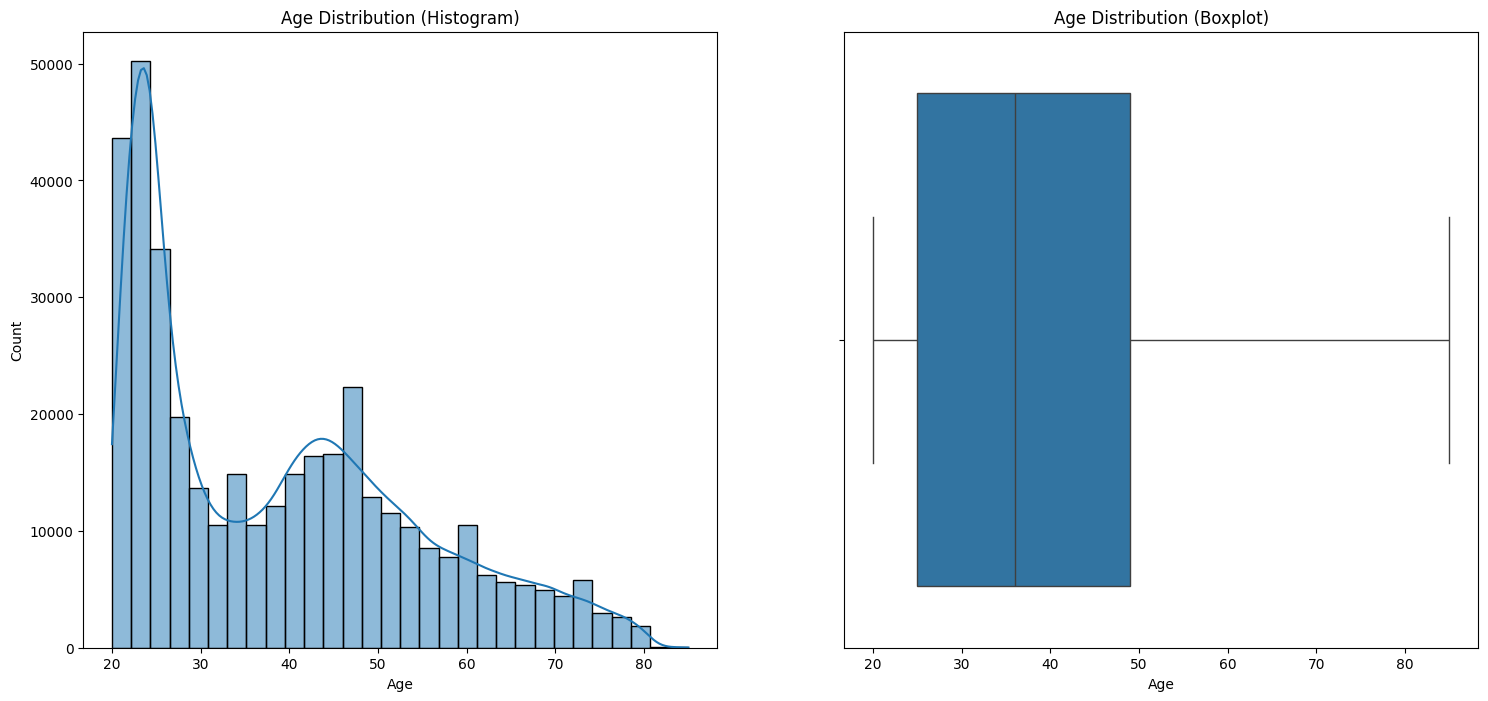

In [11]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.histplot(data = train, x = 'Age', ax = ax[0], kde = True, bins = 30)
ax[0].set_title('Age Distribution (Histogram)')
ax[1].set_title('Age Distribution (Boxplot)')
sns.boxplot(data = train, x = 'Age')
plt.show()

In [12]:
shapiro_test = stats.shapiro(train['Age'])
shapiro_statistic = shapiro_test[0]
shapiro_pvalue = shapiro_test[1]

# Print the test results
print("Shapiro-Wilk Test:")
print("Statistic:", shapiro_statistic)
print("p-value:", shapiro_pvalue)

Shapiro-Wilk Test:
Statistic: 0.91017768500043
p-value: 5.329840656194579e-136


C:\Users\user\AppData\Local\Temp\ipykernel_17972\3134115745.py:1: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 381109.
  shapiro_test = stats.shapiro(train['Age'])


As for age, it performed rougly right - skewed distribution, as the test above has smaller p - value < 0.05, which means its not normally distributed although the data seems does not posses any outliers as seen in the boxplot

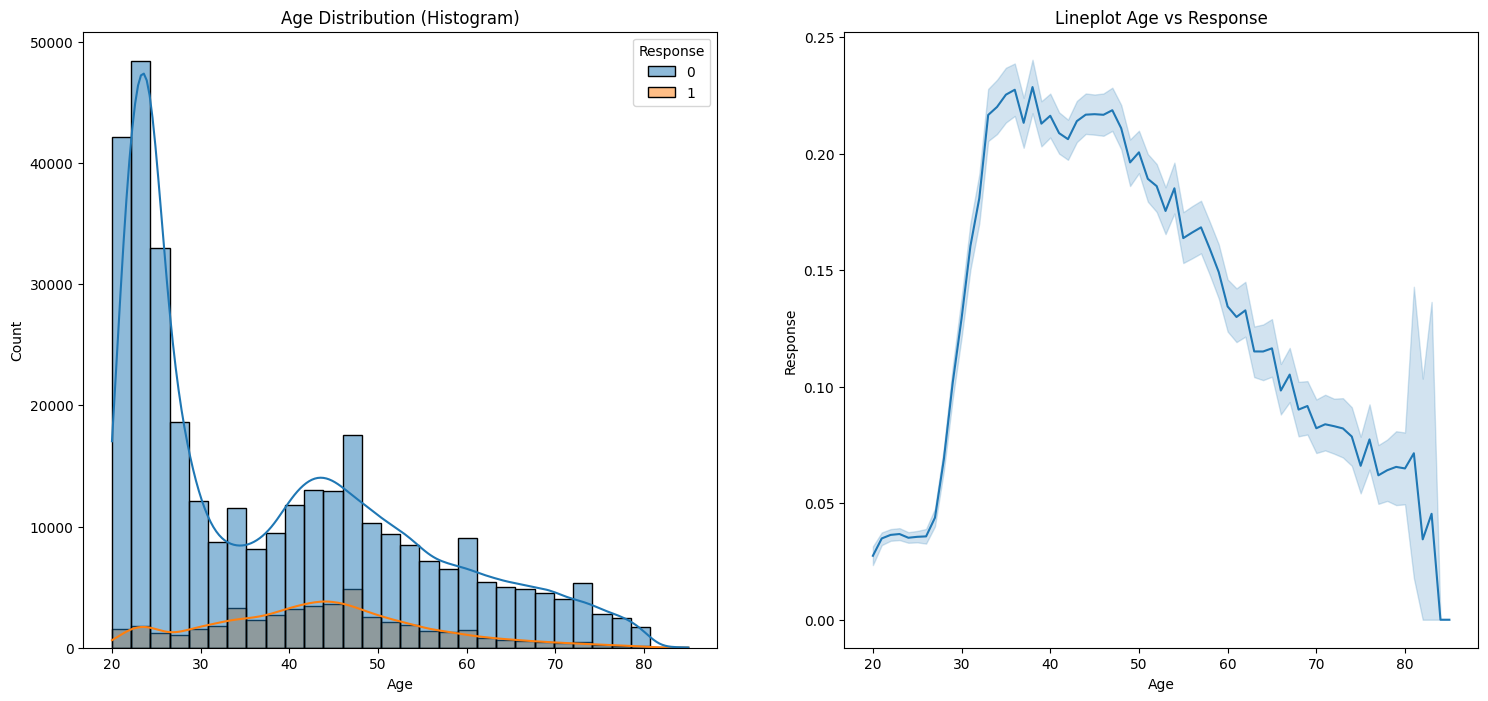

In [13]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.histplot(data = train, x = 'Age', ax = ax[0], kde = True, bins = 30, hue = 'Response')
ax[0].set_title('Age Distribution (Histogram)')
ax[1].set_title('Lineplot Age vs Response')
sns.lineplot(data = train, x = "Age", y = 'Response')
plt.show()

Because the Reponse distribution itself is mostly dominated by customer who doesn't purchase vehicle insurance, the histogram does not tells us detail about the age of customer who mostly purchase vehcile insurance. However, based on the lineplot we can see that in age 30 - 40 the chance increase drastically before it decrease linearly as the age grow older.

### Driving Liscense

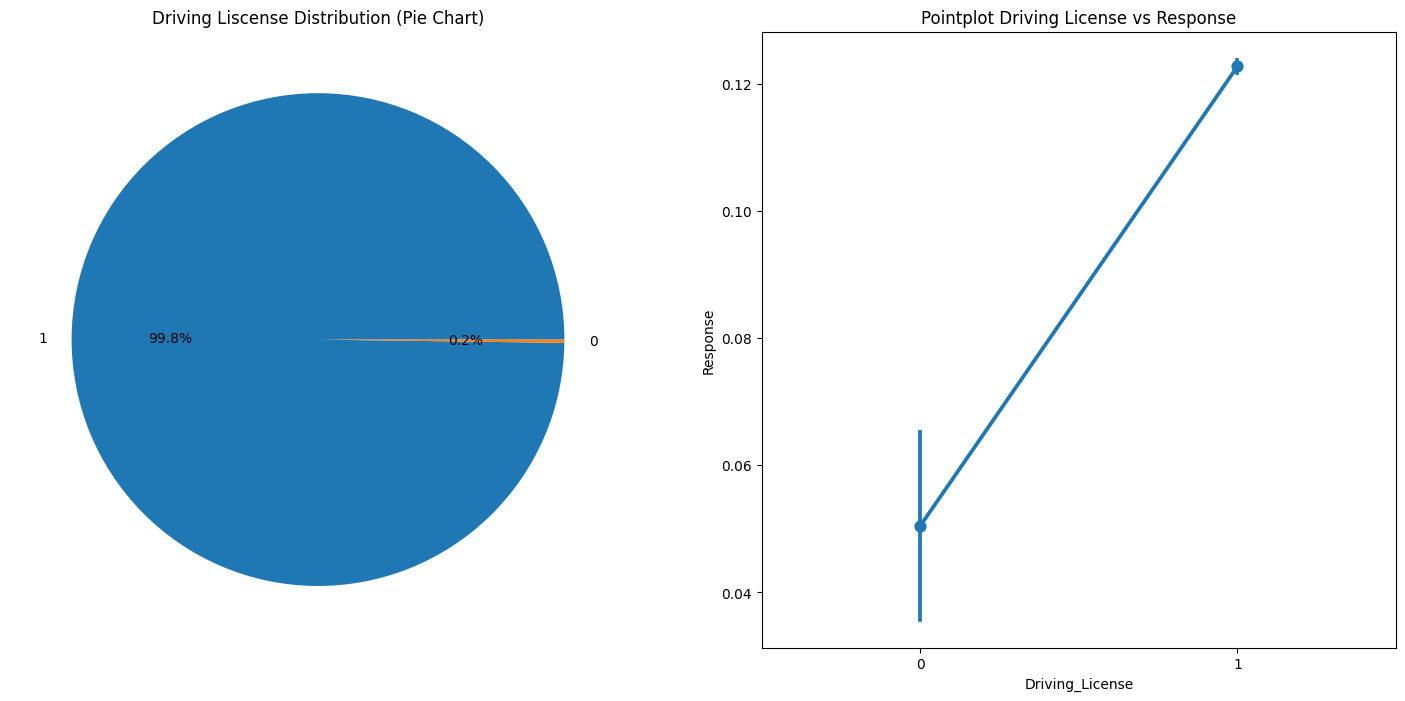

In [14]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
train['Driving_License'].value_counts().plot(kind = 'pie', ax = ax[0], autopct = '%1.1f%%')
ax[0].set_title('Driving Liscense Distribution (Pie Chart)')
ax[0].set_ylabel('')
sns.pointplot(data = train, x = 'Driving_License', y = 'Response')
ax[1].set_title('Pointplot Driving License vs Response')
plt.show()

Based on the Lineplot, owning a driving license increase the chance of buying vehicle insurance

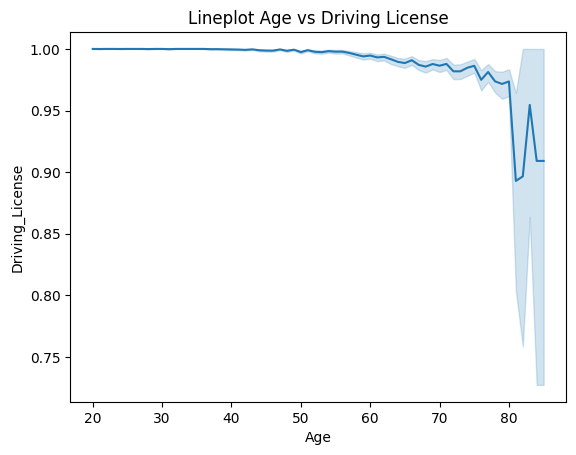

In [15]:
sns.lineplot(data = train, x= 'Age', y = 'Driving_License')
plt.title('Lineplot Age vs Driving License')
plt.show()

We can see that, the people who does not posses Driving License are mostly people with age above 70 y.o

### Region Code

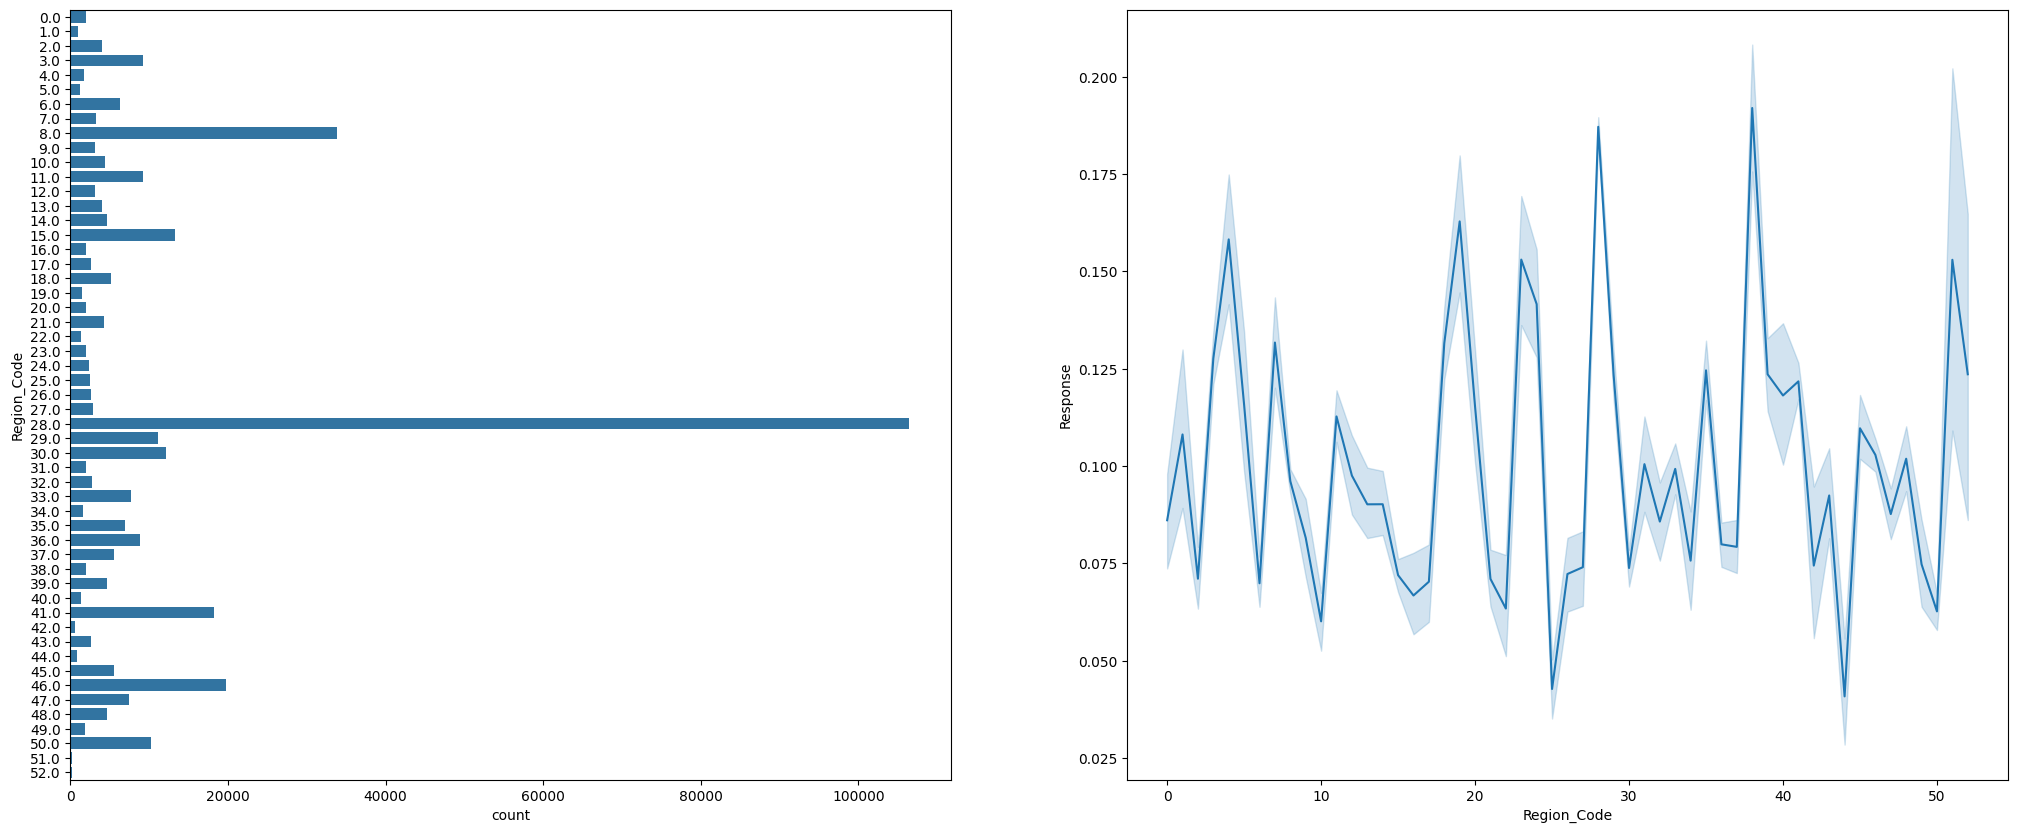

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (25, 10))
sns.countplot(data = train, y = 'Region_Code', ax = ax[0])
sns.lineplot(data = train, x = 'Region_Code', y = "Response")
plt.show()

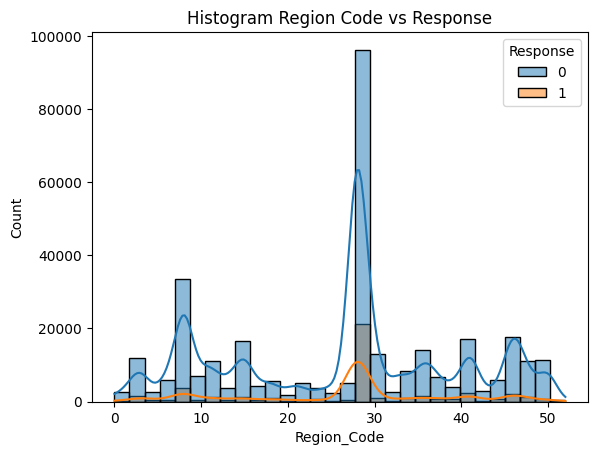

In [17]:
sns.histplot(data = train, x = 'Region_Code', bins = 30, hue = "Response", kde = True)
plt.title('Histogram Region Code vs Response')
plt.show()

Region code does not tells anything about owning vehicle insurance, as some may have higher chance than others, there is no pattern that we can take from this both relation

### Previously Insured

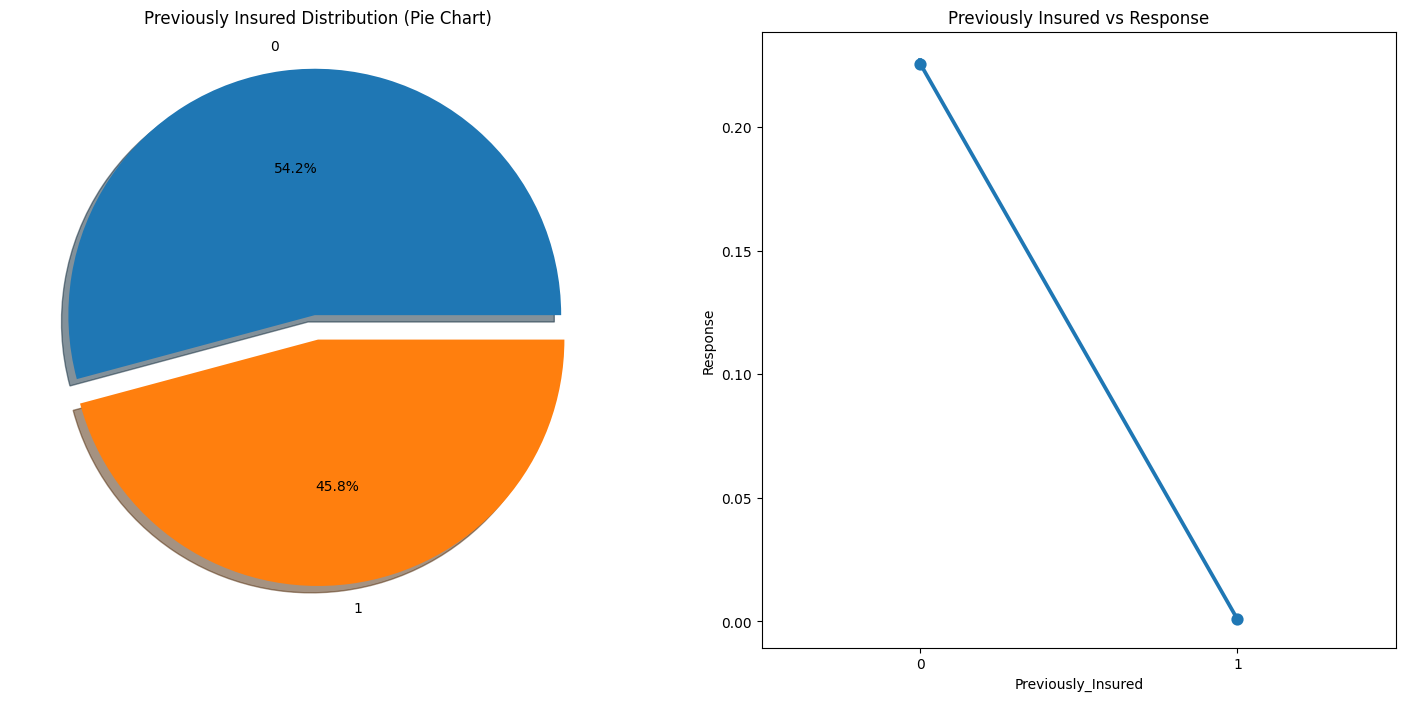

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
train['Previously_Insured'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', ax = ax[0], shadow = True, explode = [0.1, 0])
ax[0].set_ylabel('')
ax[0].set_title('Previously Insured Distribution (Pie Chart)')
sns.pointplot(data = train, x = 'Previously_Insured', y = 'Response')
ax[1].set_title('Previously Insured vs Response')
plt.show()

Surprisingly, person who previously has their vehicle insured does have lower chance to buy vehicle insurace, while the one who does not previosuly own vehicle insurance has a higher chance.

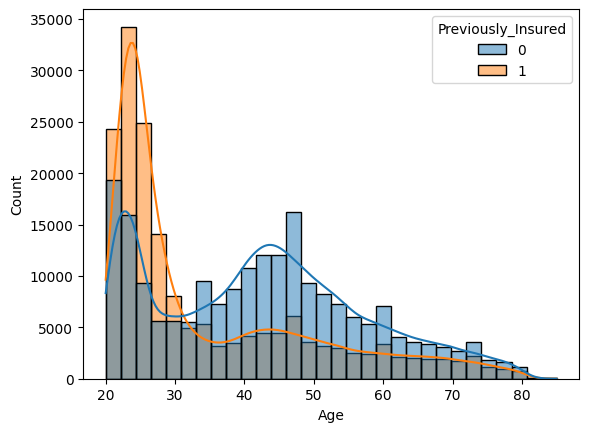

In [19]:
sns.histplot(data = train, x = 'Age', hue = 'Previously_Insured', bins = 30, kde = True)
plt.title('')
plt.show()

However, this feature is related to feature Age, where people with age above around 30 y.0 are significantly has lower chance to buy vehicle insurance. The relation is people who is above 30 y.0 does not posses insurance for their vehicle and the first graph tells us, people who previously doe not insurance their vehicle has greater chance to buy vehicle insurance.

### Vehicle Age

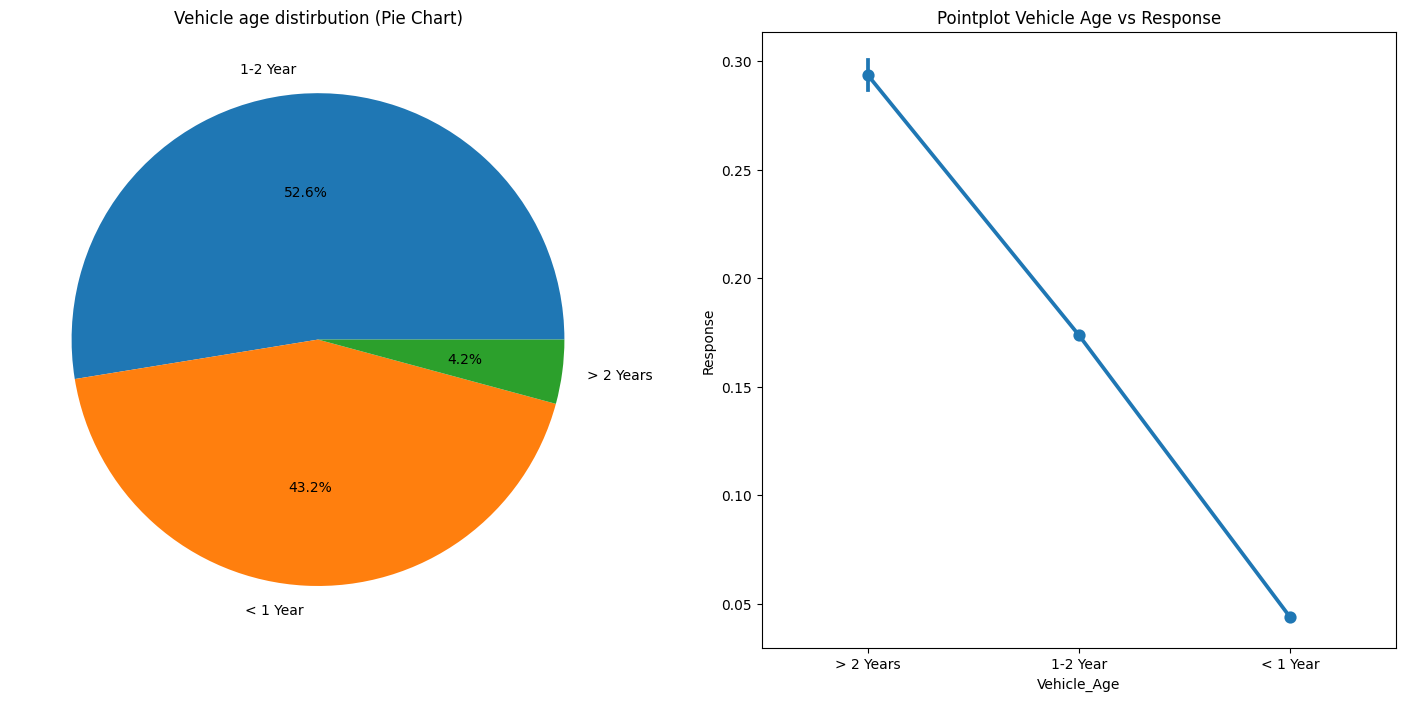

In [20]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
train['Vehicle_Age'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', ax = ax[0])
ax[0].set_title('Vehicle age distirbution (Pie Chart)')
ax[0].set_ylabel('')
sns.pointplot(data =train, x = 'Vehicle_Age', y = 'Response')
ax[1].set_title('Pointplot Vehicle Age vs Response')
plt.show()

We can see here that, although vehicle age whose > 2 years is the least occurance, it has the highest chance that the owner buying vehicle insurance

### Vehicle Damage

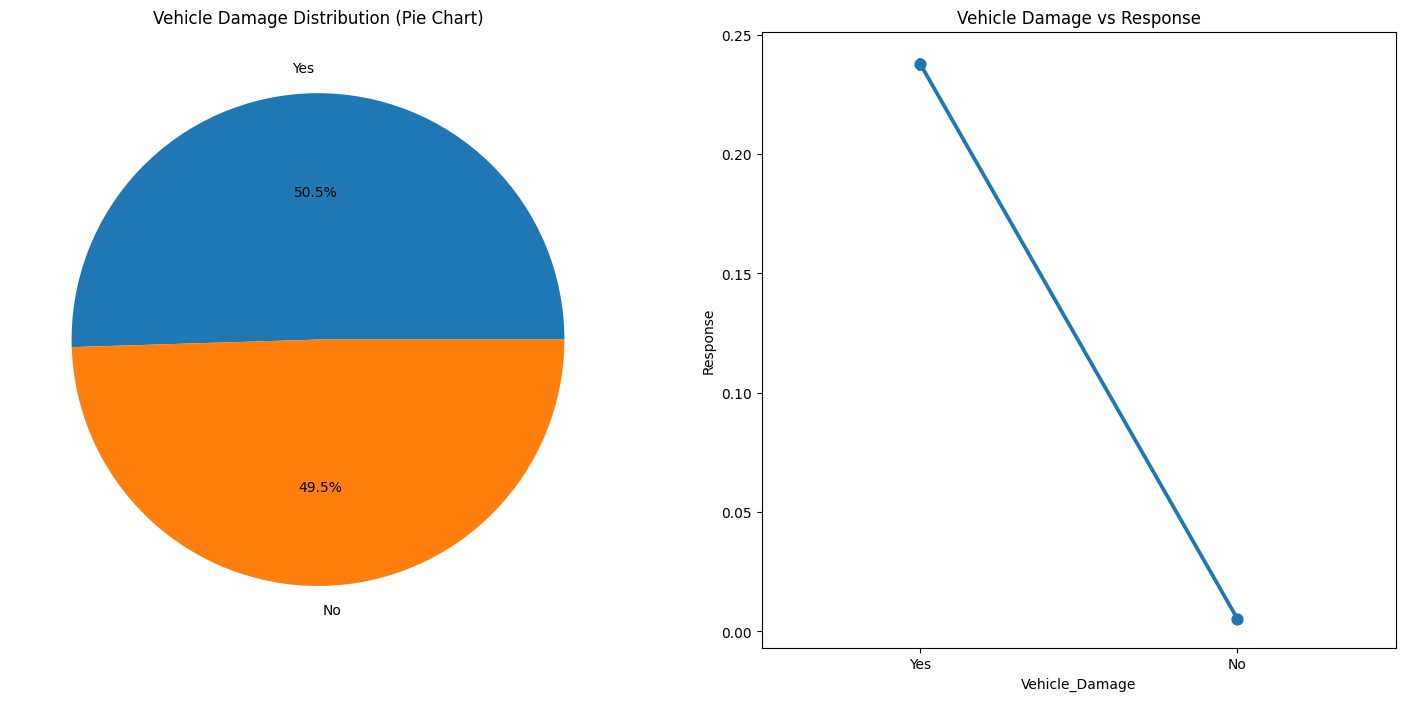

In [21]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
train['Vehicle_Damage'].value_counts().plot(kind = 'pie', ax = ax[0], autopct = '%1.1f%%')
ax[0].set_title('Vehicle Damage Distribution (Pie Chart)')
ax[0].set_ylabel('')
sns.pointplot(data = train, x = 'Vehicle_Damage', y = 'Response')
ax[1].set_title('Vehicle Damage vs Response')
plt.show()

We can see that, the vehicel who has been damaged has a higher chance for the owners to buy vehicle insurance.

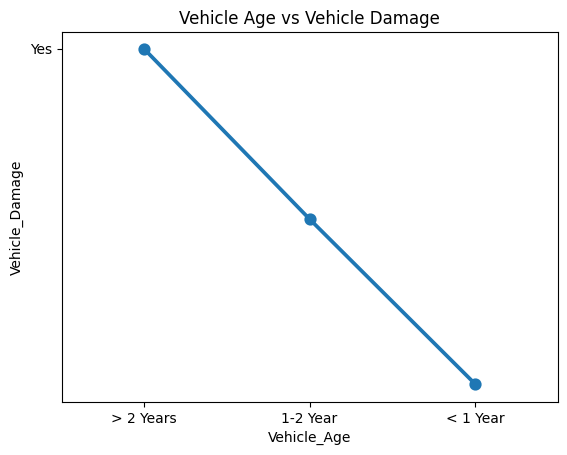

In [22]:
sns.pointplot(data = train, x = 'Vehicle_Age', y = 'Vehicle_Damage')
plt.title('Vehicle Age vs Vehicle Damage')
plt.show()

As for Age and Damage, the older the vehicle is, the higher the chance the vehicle is damaged.

### Annual Premium

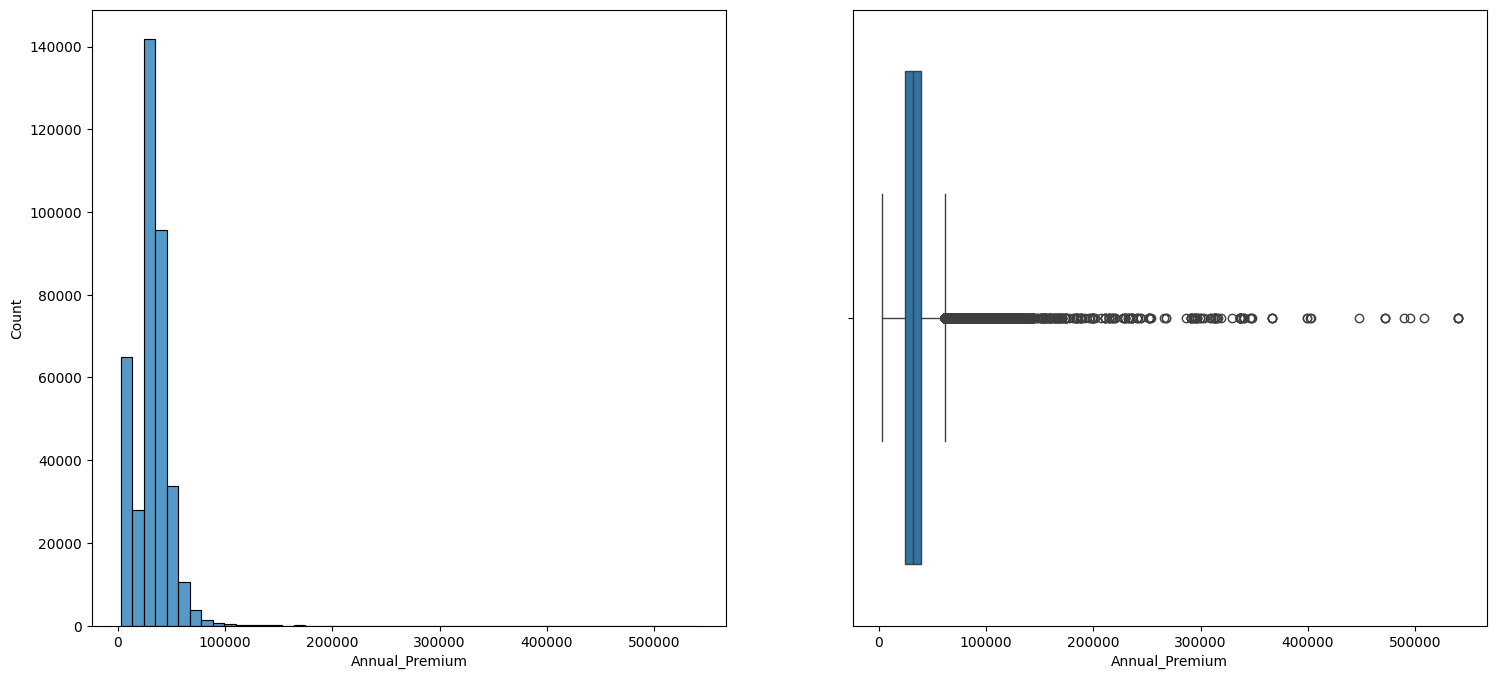

In [23]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.histplot(data = train, x = 'Annual_Premium', ax = ax[0], bins = 50)
sns.boxplot(data = train, x = 'Annual_Premium')
plt.show()

We can see that Annual Premium is not Normaly distributed, as there is many outliers for this data

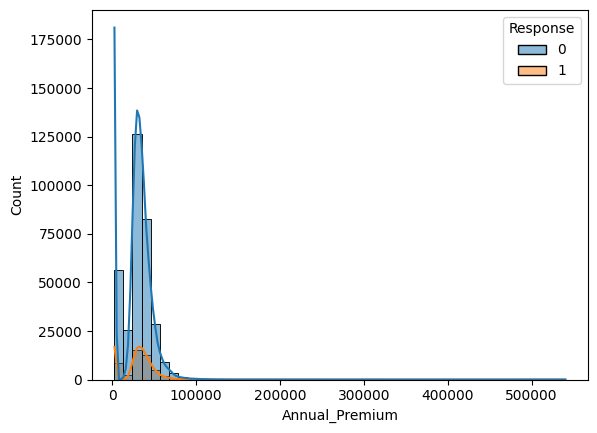

In [24]:
sns.histplot(data = train, x = 'Annual_Premium', bins = 50, hue = 'Response', kde = True)
plt.show()

### Policy Sales Channel

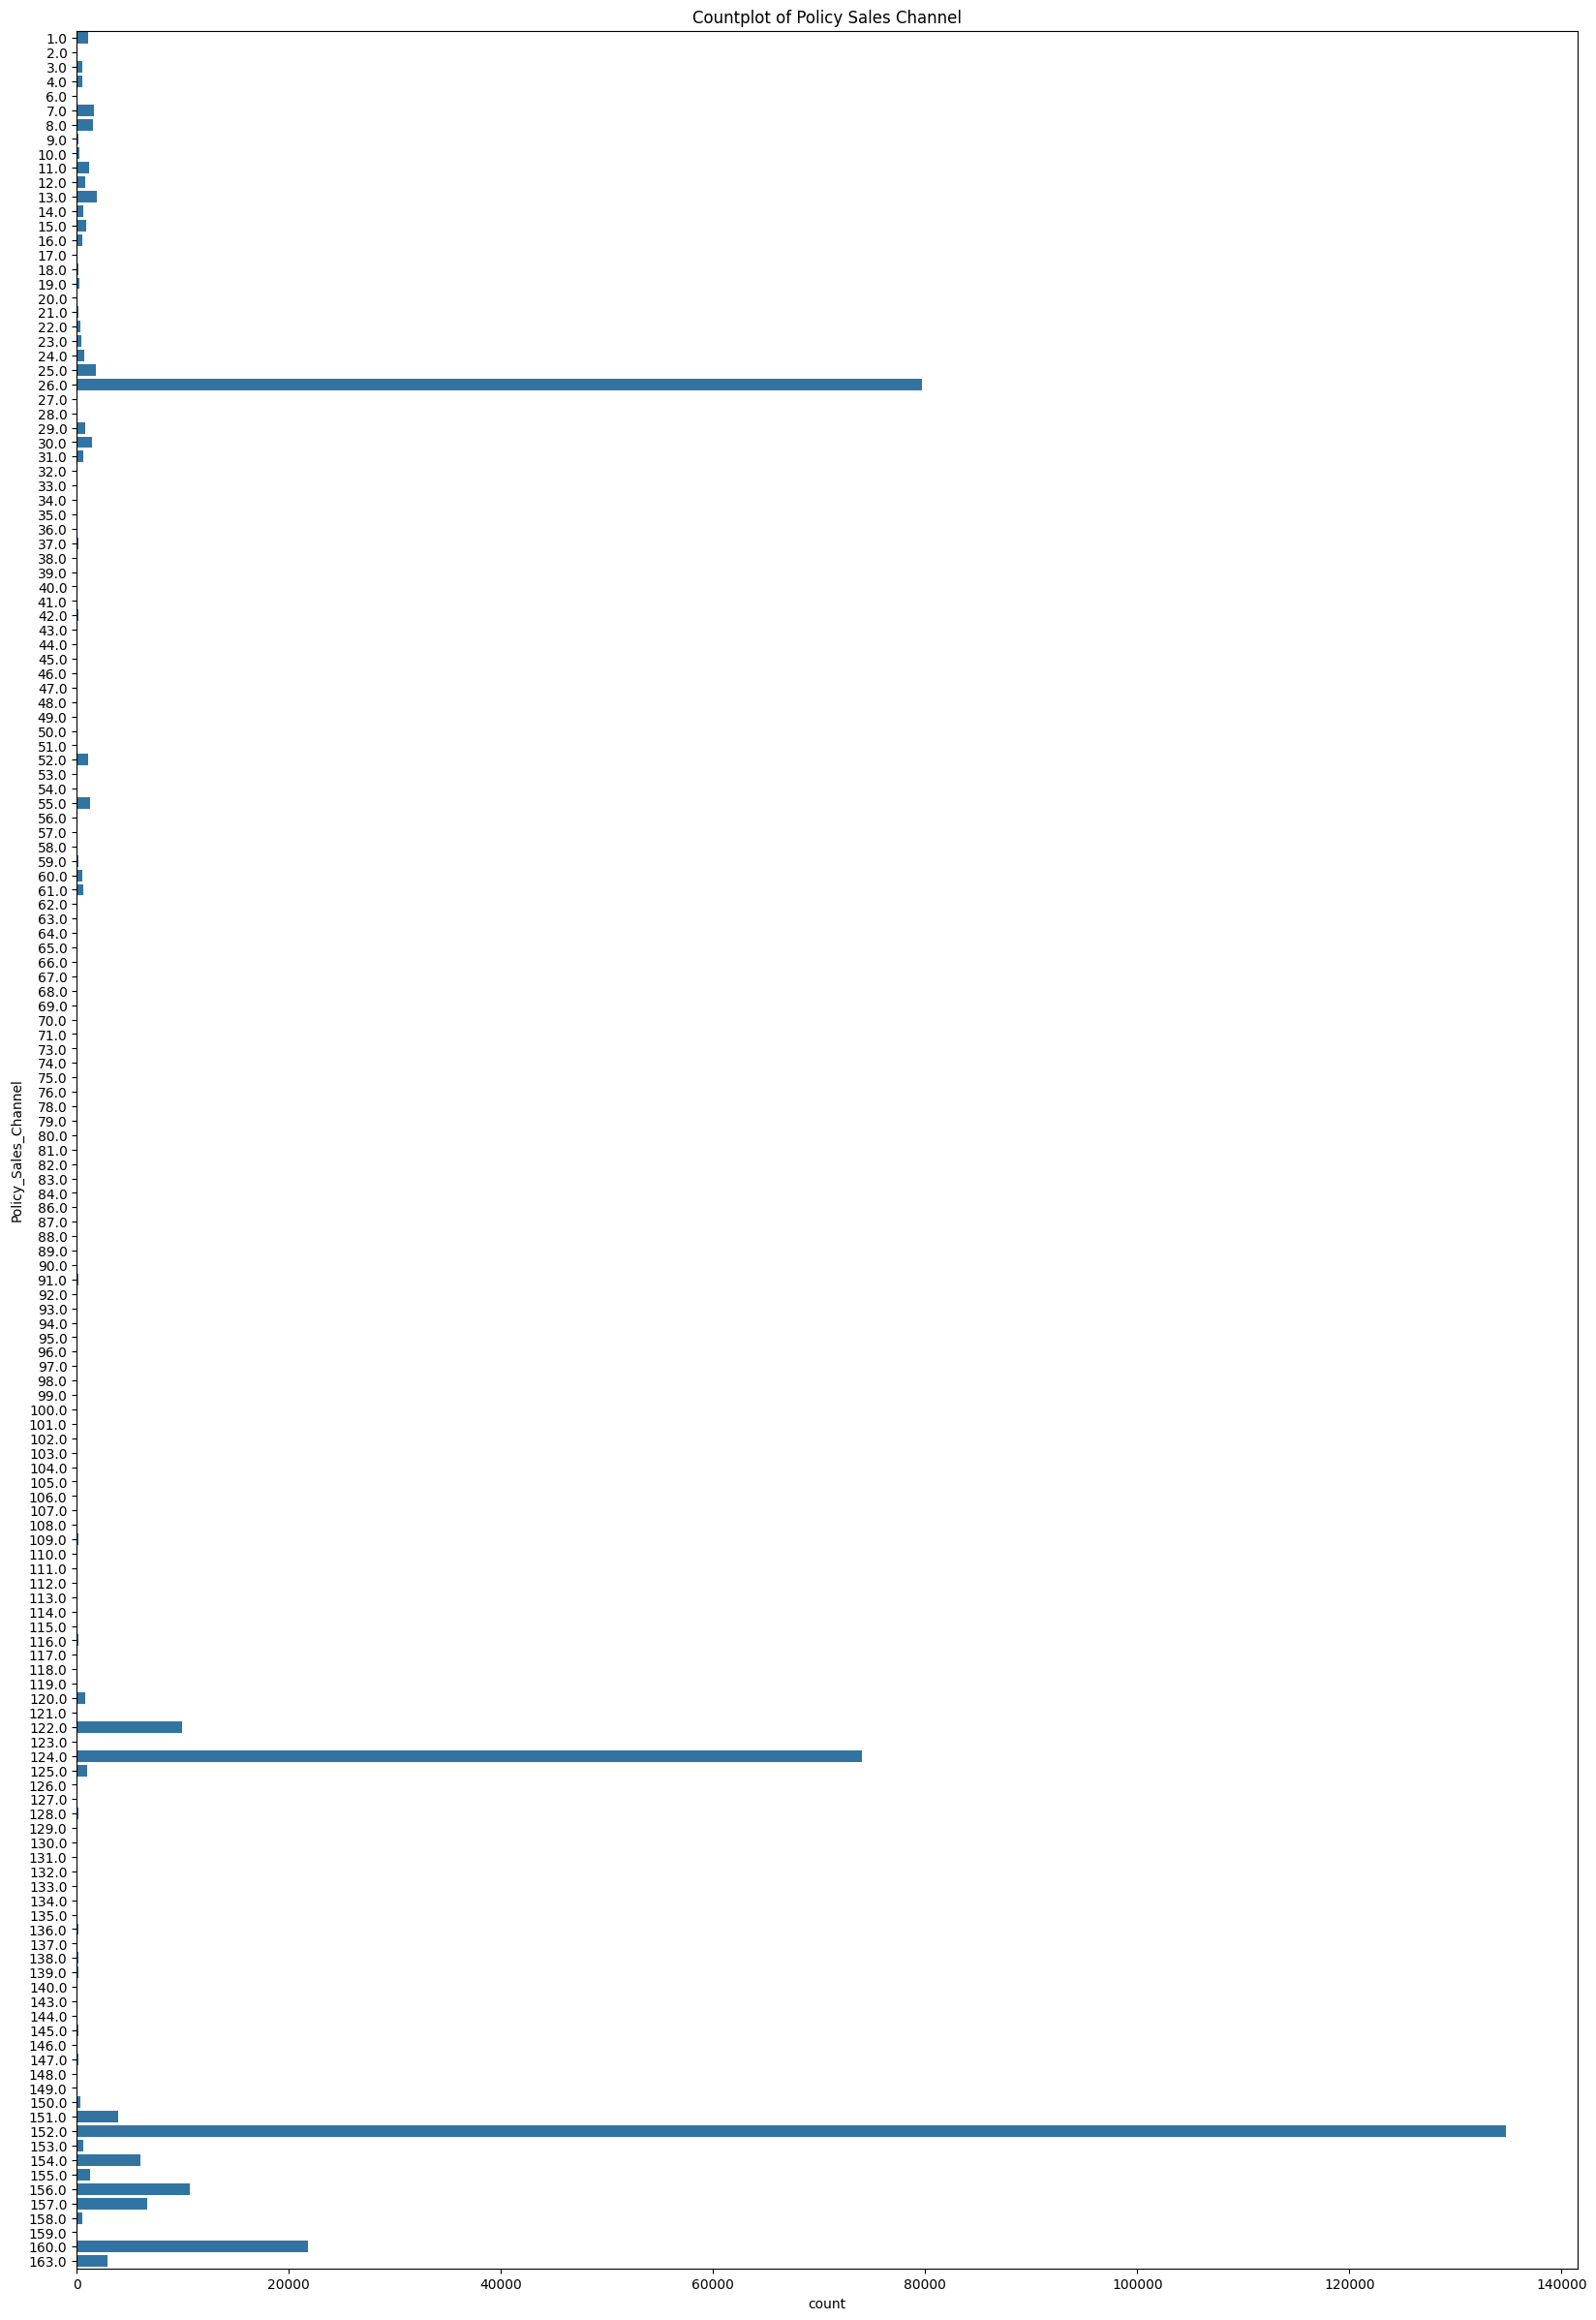

In [25]:
plt.figure(figsize=(20, 30))
sns.countplot(data = train, y ='Policy_Sales_Channel')
plt.title('Countplot of Policy Sales Channel')
plt.show()

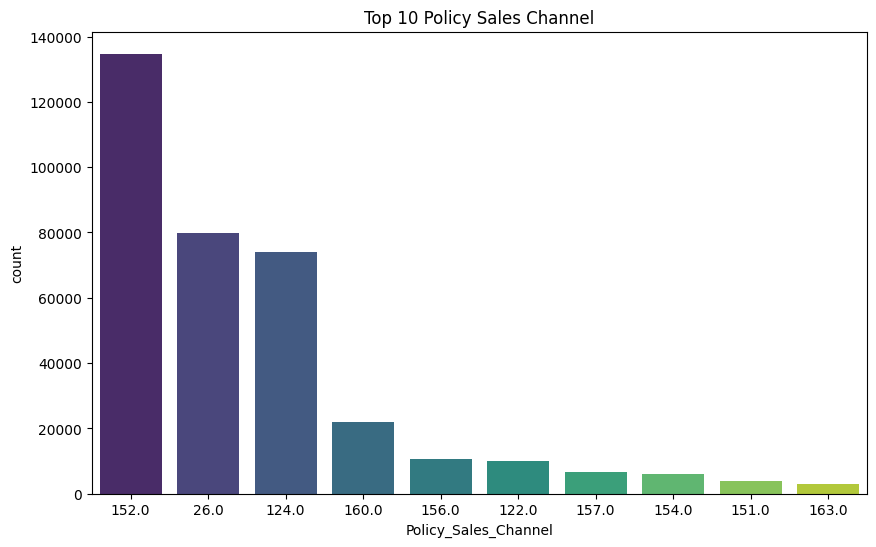

In [26]:
top_channels = train['Policy_Sales_Channel'].value_counts().head(10).index
df_top_channels = train[train['Policy_Sales_Channel'].isin(top_channels)]
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_channels, x='Policy_Sales_Channel', order=top_channels, palette='viridis')
plt.title('Top 10 Policy Sales Channel')
plt.show()

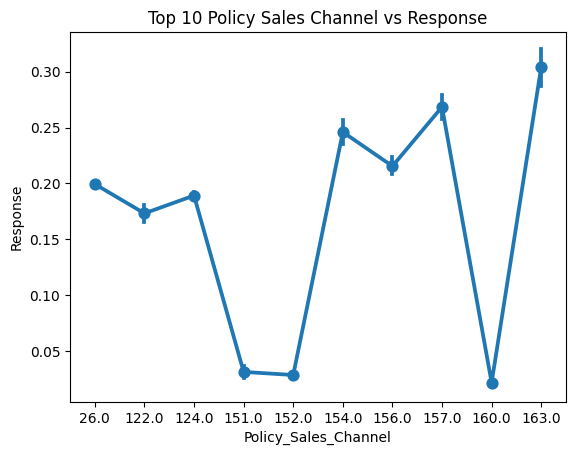

In [27]:
sns.pointplot(data = df_top_channels, x = 'Policy_Sales_Channel', y = 'Response')
plt.title('Top 10 Policy Sales Channel vs Response')
plt.show()

We can see that from 10 most Policy Sales Channel, Policy Sales Channel with code 163 has the highest chance to persuade owner to buy insurance for their vehicles.

### Vintage

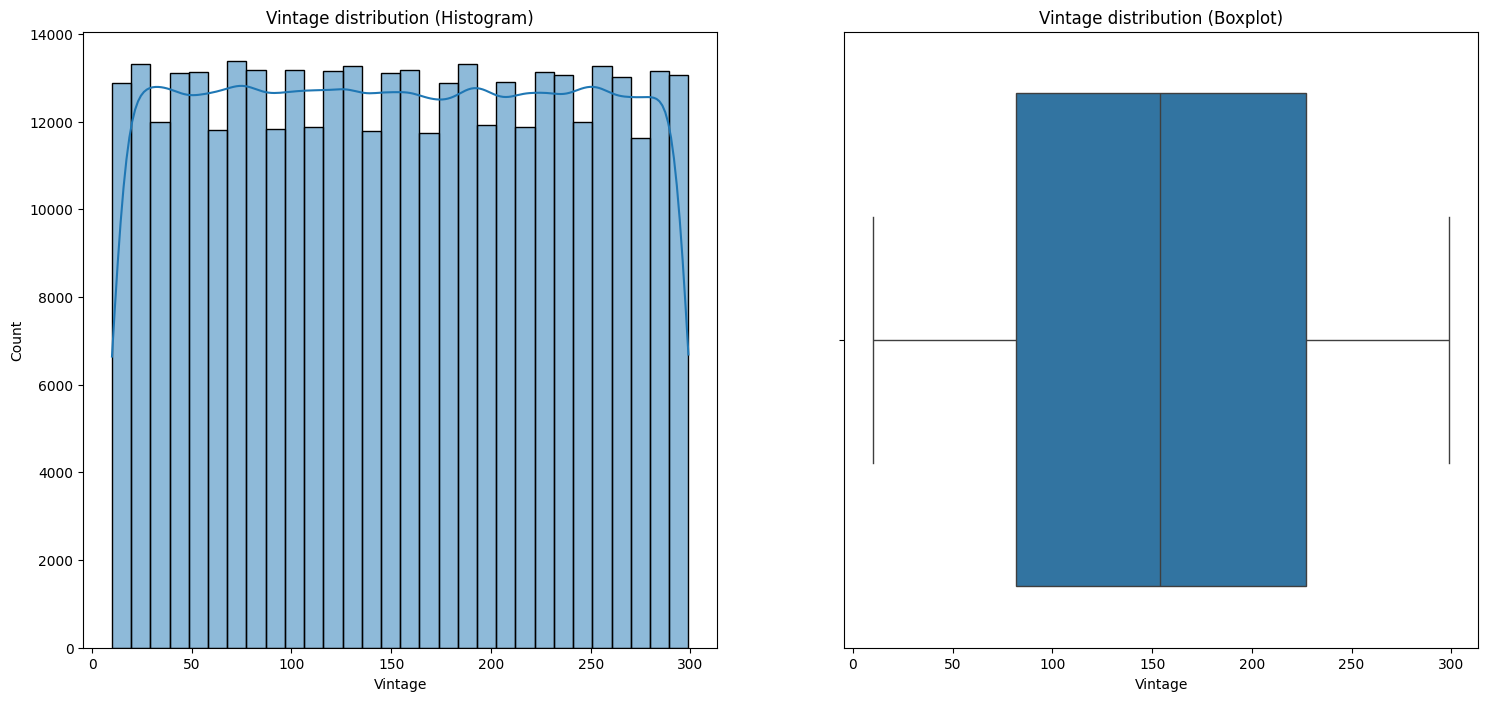

In [28]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.histplot(data = train, x = 'Vintage', ax = ax[0], bins = 30, kde = True)
sns.boxplot(data = train, x= 'Vintage')
ax[0].set_title('Vintage distribution (Histogram)')
ax[1].set_title('Vintage distribution (Boxplot)')
plt.show()

We could see that Vintage perform a uniform distribution

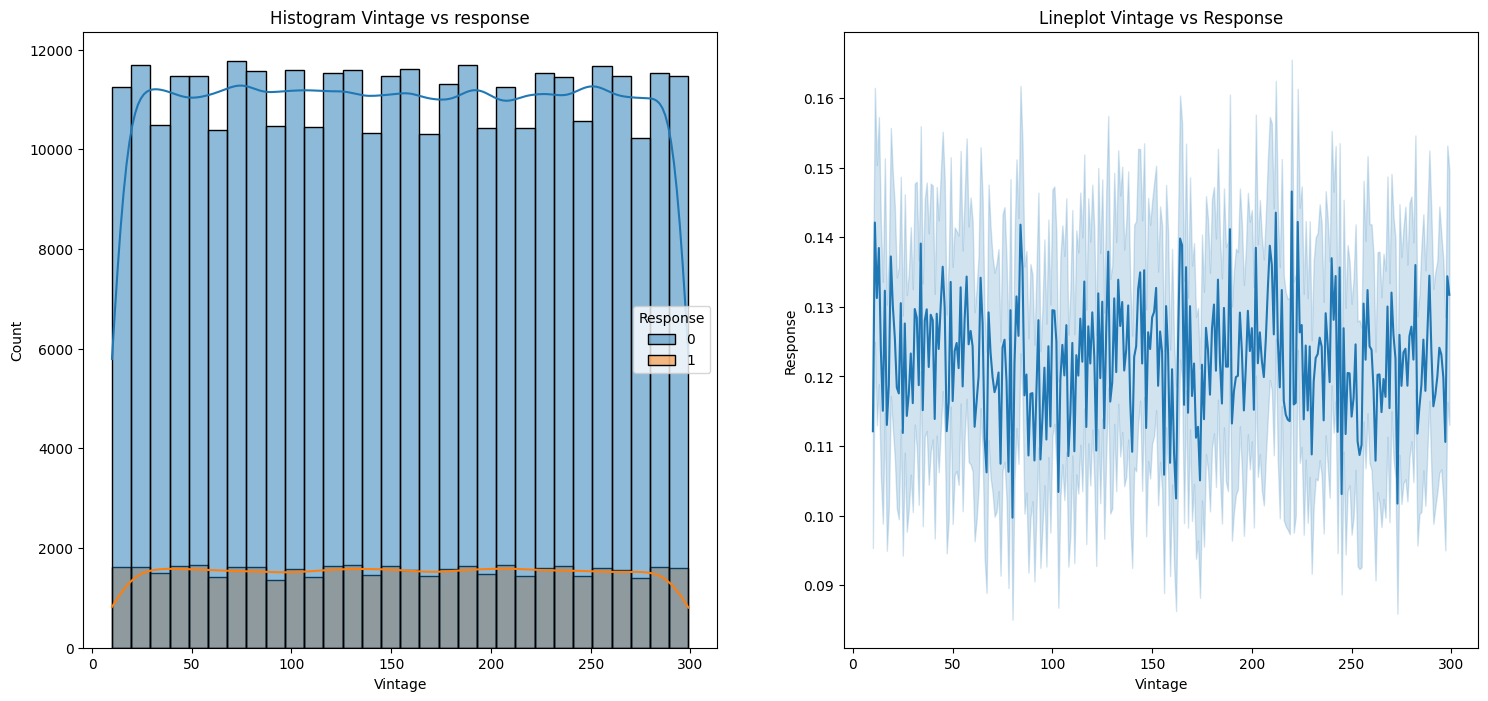

In [29]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.histplot(data = train, x = 'Vintage', ax = ax[0], bins = 30, kde = True, hue = 'Response')
sns.lineplot(data = train, x = 'Vintage', y = 'Response')
ax[0].set_title('Histogram Vintage vs response')
ax[1].set_title('Lineplot Vintage vs Response')
plt.show()

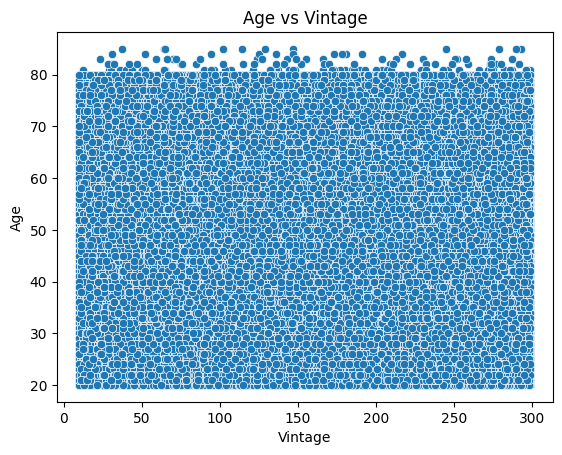

In [30]:
sns.scatterplot(data = train, x = 'Vintage', y = 'Age')
plt.title('Age vs Vintage')
plt.show()

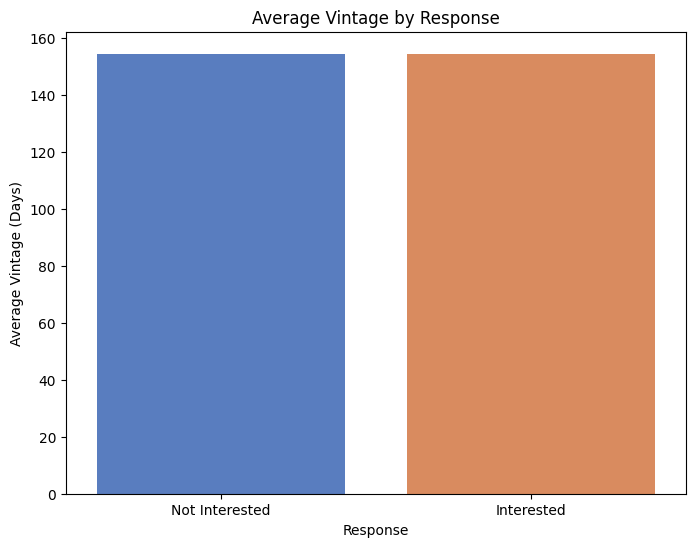

In [31]:
# Grouped bar plot of average Vintage by Response
plt.figure(figsize=(8, 6))
sns.barplot(data=train, x='Response', y='Vintage', estimator=pd.Series.mean, ci=None, palette='muted')
plt.title('Average Vintage by Response')
plt.xlabel('Response')
plt.ylabel('Average Vintage (Days)')
plt.xticks(ticks=[0, 1], labels=['Not Interested', 'Interested'])
plt.show()

As for vintage, there is no pattern we can analyze

## Useful Patterns

1. Customer with Age around 40 y.o has the highest chance to buy Vehicle Insurance.<br>
2. Male Customer also has higher chance to buy Vehicle Insurance.<br>
3. For Driving License, people with age > 70 has lower chance to own Driving License, as for owning Driving License increase the chance to buy Vehicle insurance.<br>
4. Customer that previously doesnt have their car insured before, has higher chance to buy Vehicle Insurance.<br>
5. For Vehicle Age and Damage, the older the vehicle the highest chance the vehicle is damaged, thus increasing the chance the owner to buy vehicle insurance.

## Feature Correlation

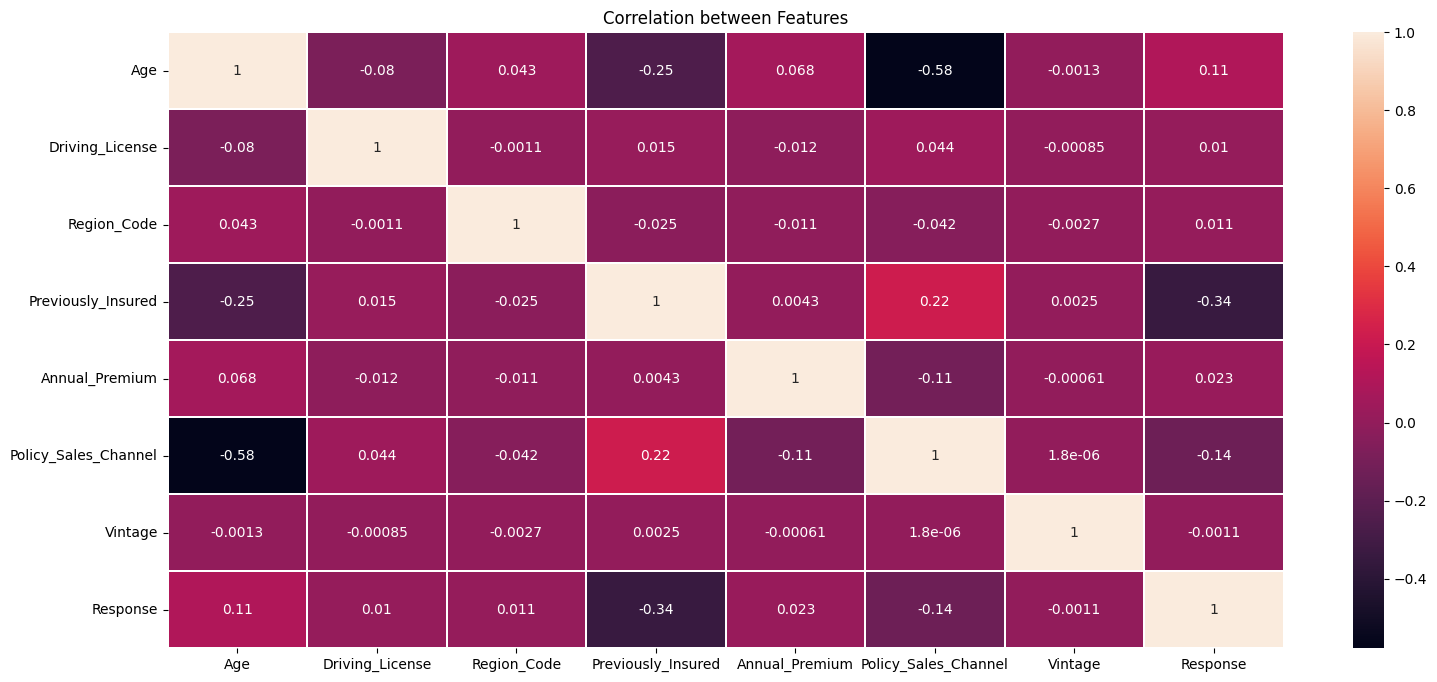

In [32]:
plt.figure(figsize=(18, 8))
numerical = train.select_dtypes(include='number')
sns.heatmap(data = numerical.corr(), annot= True, linewidths=0.2)
plt.title('Correlation between Features')
plt.show()

Because every feature has correlation < 0.7, there is no features we need to drop

# Data Preprocessing

## Splitting Feature and Target

In [33]:
X = train.drop(columns=['Response'])
y = train['Response']

In [34]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 0)
X, y = rus.fit_resample(X, y)

## Encoding Categorical Variable

In [35]:
X = pd.get_dummies(X, drop_first=True)
X.rename(columns={'Vehicle_Age_< 1 Year': 'Under 1 Year', 'Vehicle_Age_> 2 Years': 'More than 2 Years'}, inplace=True)
X

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male,Under 1 Year,More than 2 Years,Vehicle_Damage_Yes
297950,22,1,50.0,1,32605.0,152.0,190,False,True,False,False
18163,41,1,28.0,0,30346.0,124.0,168,True,False,False,True
265985,22,1,46.0,1,27919.0,160.0,167,False,True,False,False
142020,21,1,37.0,0,43495.0,160.0,87,False,True,False,True
170455,26,1,30.0,1,31088.0,152.0,228,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
381057,40,1,46.0,0,27508.0,26.0,189,True,False,False,True
381061,41,1,28.0,0,37377.0,124.0,99,False,False,False,True
381073,46,1,28.0,0,34741.0,124.0,167,False,False,False,True
381075,61,1,28.0,0,43875.0,26.0,139,False,False,False,True


## Splitting Train and Test Set

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [37]:
X_train

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male,Under 1 Year,More than 2 Years,Vehicle_Damage_Yes
215212,34,1,36.0,0,2630.0,26.0,254,True,False,False,True
130066,30,1,46.0,1,30464.0,26.0,51,False,True,False,False
112338,25,1,29.0,1,43675.0,152.0,49,False,True,False,False
137646,27,1,15.0,1,26909.0,160.0,20,False,True,False,False
41627,55,1,28.0,0,38497.0,26.0,60,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...
234209,22,1,30.0,1,25714.0,152.0,257,False,True,False,False
365381,30,1,30.0,1,23873.0,152.0,208,False,True,False,False
341310,50,1,24.0,1,2630.0,26.0,256,False,False,False,True
119366,24,1,8.0,1,36349.0,152.0,161,False,True,False,False


## Feature Scaling

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.iloc[:, [0, 4, 6]] = sc.fit_transform(X_train.iloc[:, [0, 4, 6]])
X_test.iloc[:, [0, 4, 6]] = sc.fit_transform(X_test.iloc[:, [0, 4, 6]])

# Modeling

## Template

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

def modeling(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = cross_val_score(model, X_train, y_train, cv=10)
    print(f'{name} Evaluation')
    print('Model Accuracy: ', accuracy_score(y_test, y_pred))
    print('Model Precission: ', precision_score(y_test, y_pred))
    print('Model Recall: ', recall_score(y_test, y_pred))
    print('Cross Validation (10): ', score.mean())
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()

### Logistic Regression

Logistic Regression Evaluation
Model Accuracy:  0.7850567330336117
Model Precission:  0.7086589801129769
Model Recall:  0.9733234137527899
Cross Validation (10):  0.7825009889316641


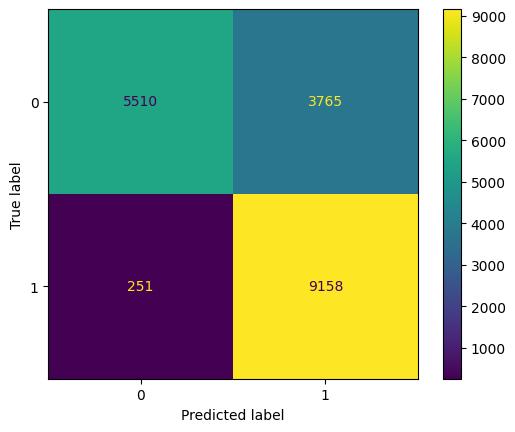

In [40]:
from sklearn.linear_model import LogisticRegression
linear = LogisticRegression(max_iter=1000)
modeling(linear, 'Logistic Regression')

### Support Vector Machine (SVM)

#### Linear Kernel

In [41]:
# from sklearn.svm import SVC
# svm = SVC(kernel='linear')
# modeling(svm, 'SVM')

#### Rbf Kernel

In [42]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf')
modeling(svm, 'SVM')

#### Sigmoid Kernel

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='sigmoid')
modeling(svm, 'SVM')

### Random Forest Classifier

Random Forest Evaluation
Model Accuracy:  0.75626204238921
Model Precission:  0.7422896496656353
Model Recall:  0.7904134339462217
Cross Validation (10):  0.7565027193964637


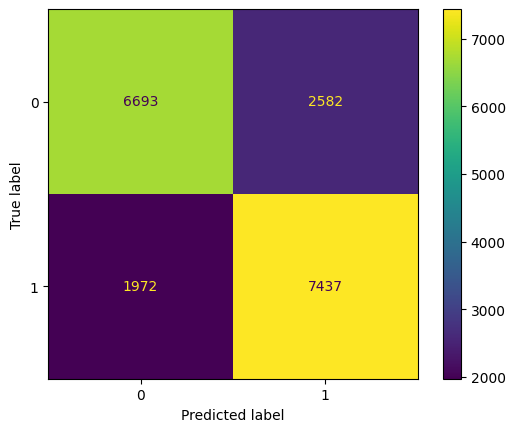

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10)
modeling(forest, 'Random Forest')

### XgBoost

XGBoost Evaluation
Model Accuracy:  0.7981160351102548
Model Precission:  0.7435410006048562
Model Recall:  0.9145498990328409
Cross Validation (10):  0.7961222115788457


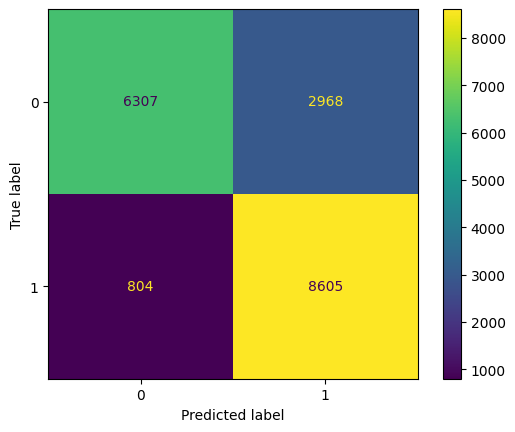

In [ ]:
from xgboost import XGBClassifier
xgboost = XGBClassifier()
modeling(xgboost, 'XGBoost')